In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Get tensorflor and tf.keras
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.8.0


In [ ]:
#Load MNIST
digits_mnist = keras.datasets.mnist

#extract the dataset into tuples of numpy arrays
(x_train, y_train), (x_test, y_test) = digits_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/255

In [ ]:
model = keras.models.Sequential()

#Flatten Layer
model.add(keras.layers.Flatten(input_shape=(28,28)))

#Dense layer
model.add(keras.layers.Dense(128, activation = 'relu'))

#Output layer
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [ ]:
model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest Accuracy: ', test_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2626 - accuracy: 0.9245
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1162 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0791 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0583 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

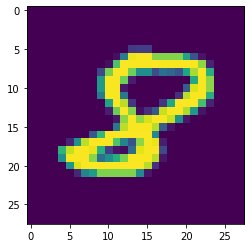

Ground Truth: 8
Predicted Digit Provabilities: [[9.4622374e-07 1.2971296e-11 1.8694361e-03 7.9101461e-08 3.2134545e-10
  1.5364372e-09 5.0808250e-08 5.1521489e-09 9.9812955e-01 1.8552425e-09]]
Precited Digit: 8


In [ ]:
k = 61 # used to test images

#Show image and label
test_image = x_test[k]
plt.imshow(test_image)
plt.show()
print("Ground Truth:", y_test[k])

#predict and print the Predicted Digit Probabilities from the model

input = np.expand_dims(test_image, axis = 0)
predicted_digit_probabilities = model.predict(input)
print("Predicted Digit Provabilities:", predicted_digit_probabilities)

#print the most probable digit from the Predicted Digit Probabilities
predicted_digit = np.argmax(predicted_digit_probabilities) #get array index of the max val
print("Precited Digit:", predicted_digit)

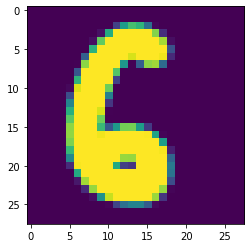

Label: 6


In [ ]:
import os
import glob
import numpy as np
from PIL import Image

x_custom = []
y_custom = []
#Use glove to get a list of paths of .png files in the my_data folder
paths = glob.glob("/content/my_data/*.png")

for path in paths:
  #read the file to image
  image = Image.open(path)

  #convert the image to numpy array
  data = np.asarray(image)

  #convert RGB to grayscale by selecting one color channel
  data = data[:,:,0]

  #convert to float
  data = data.astype('float32')/255

  #invert values from black to white
  data = 1 - data

  #add converted image data to x_custom
  x_custom.append(data)

  #get the filename from path
  filename = os.path.basename(path)

  #get the label from filename
  label = filename.split("_")[0]

  #add label as int to y_custom
  y_custom.append(int(label))



i = 0
plt.imshow(x_custom[i])
plt.show()
print(f"Label: {y_custom[i]}")

In [ ]:
custom_loss, custom_acc = model.evaluate(np.asarray(x_custom), np.asarray(y_custom), verbose = 2)
print('Accuracy on a custom dataset: ', custom_acc)

1/1 - 0s - loss: 5.0548 - accuracy: 0.5000 - 95ms/epoch - 95ms/step
Accuracy on a custom dataset:  0.5


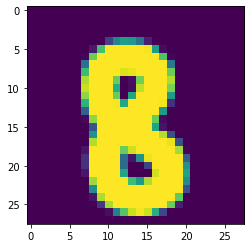

Ground Truth: 8
Predicted Digit Provabilities: [[2.2772531e-10 3.2516572e-15 5.3700703e-12 9.2310067e-08 6.8919259e-16
  2.0503861e-09 1.9089303e-12 2.8008802e-15 9.9999988e-01 5.6625180e-09]]
Precited Digit: 8


In [ ]:
k = 9 # used to test images

#Show image and label
test_image = x_custom[k]
plt.imshow(test_image)
plt.show()
print("Ground Truth:", y_custom[k])

#predict and print the Predicted Digit Probabilities from the model

input = np.expand_dims(test_image, axis = 0)
predicted_digit_probabilities = model.predict(input)
print("Predicted Digit Provabilities:", predicted_digit_probabilities)

#print the most probable digit from the Predicted Digit Probabilities
predicted_digit = np.argmax(predicted_digit_probabilities) #get array index of the max val
print("Precited Digit:", predicted_digit)